<a href="https://www.kaggle.com/code/ziniajoti/housing-data-practice?scriptVersionId=224435749" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Housing Data Analysis**

## Author
#### Zinia Sultana Joti

## Overview

This Kaggle notebook explores housing data using various machine learning models to predict housing prices. The primary objectives include understanding price distribution, key factors influencing property values, and applying predictive modeling techniques.

## Dataset
Key variables include:

Price: The selling price of the house

Bedrooms: Number of bedrooms

Bathrooms: Number of bathrooms

Area (sq ft): Total area of the house

## Exploratiry Data Analysis (EDA)

- **Data Cleaning:** Handling missing values, removing duplicates, and ensuring consistent data types.

- **Descriptive Statistics:** Summarizing key insights using mean, median, standard deviation, and visualizations.

- **Correlation Analysis:** Identifying relationships between price and other features using correlation matrices and scatter plots.

- **Visualization:** Using box plots and heatmaps to better understand data distribution and trends.

## Feature Engineering
- Creating new features like large_house.

## Models Used
1. Linear Regression: A baseline model to establish a simple relationship between features and target prices.
2. Decision Tree Regressor: A non-linear model that captures complex patterns in the data.
3. Random Forest Regressor: An ensemble learning method improving decision trees through bagging.
4. Polynomial-Linear Regression: Extends linear regression by including polynomial terms to capture non-linearity.
5. Polynomial-Ridge Regression: A regularized version of polynomial regression that prevents overfitting.

## Evaluation Metrics
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* R-squared Score (R²)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housing-prices-dataset


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy


from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
#read data
df = pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')

In [4]:
print("Learn about the Dataset")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Name of headers:\n{df.columns.tolist()}")
print(f"Number of blank data:\n{df.isnull().sum()}")
print(f"Info:{df.info()}")

Learn about the Dataset
Number of rows: 545
Number of columns: 13
Name of headers:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Number of blank data:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int6

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
#one hot encoding for furnishingstatus, since it has 3 unique values
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnish', dtype=int)

In [7]:
# Converting categorical data into numerical data
binary_col = [ 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for i in binary_col:
    df[i] = df[i].map({'yes': 1, 'no' : 0}).fillna(0)

<Axes: >

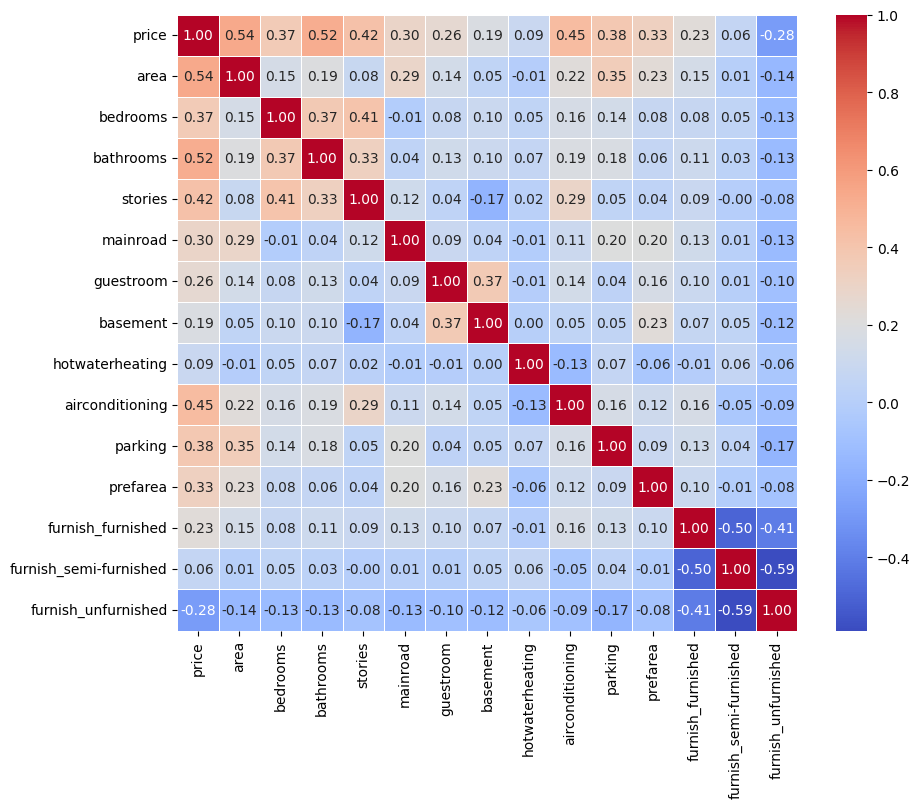

In [8]:
# Corelation matrix
plt.figure(figsize=(10, 8)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [9]:
# Correlation
df_copy = df.copy()
corr_df = df_copy.corr()
corr_df =corr_df.drop(['price'], axis=0 )
print("Correlation between Target variable(price) and other variables: ")
print(corr_df['price'])

Correlation between Target variable(price) and other variables: 
area                      0.535997
bedrooms                  0.366494
bathrooms                 0.517545
stories                   0.420712
mainroad                  0.296898
guestroom                 0.255517
basement                  0.187057
hotwaterheating           0.093073
airconditioning           0.452954
parking                   0.384394
prefarea                  0.329777
furnish_furnished         0.229350
furnish_semi-furnished    0.063656
furnish_unfurnished      -0.280587
Name: price, dtype: float64


In [10]:
# Preparing dataset

X = df.drop(['price'], axis=1) #independent_var
y = df['price'] #target or dependent

print("Shape of X(independent variable): ", X.shape)
print("Shape of y(dependent variable): ", y.shape)

Shape of X(independent variable):  (545, 14)
Shape of y(dependent variable):  (545,)


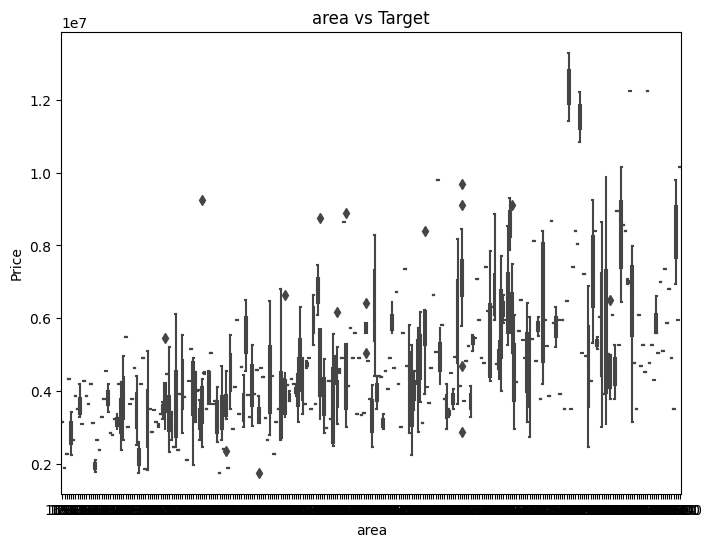

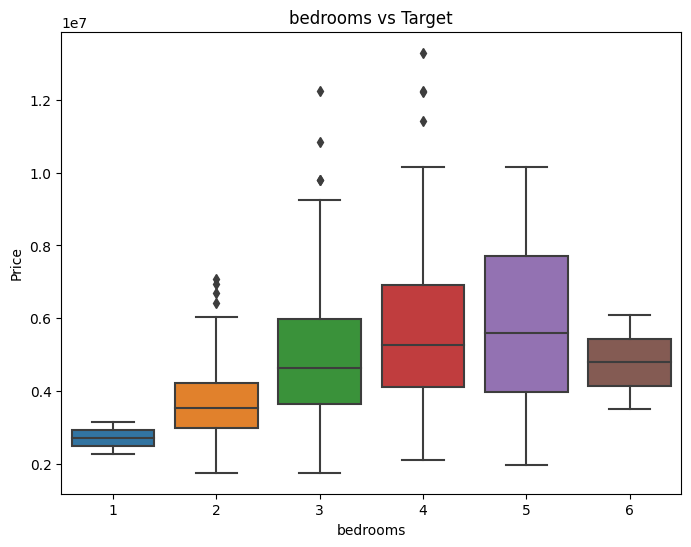

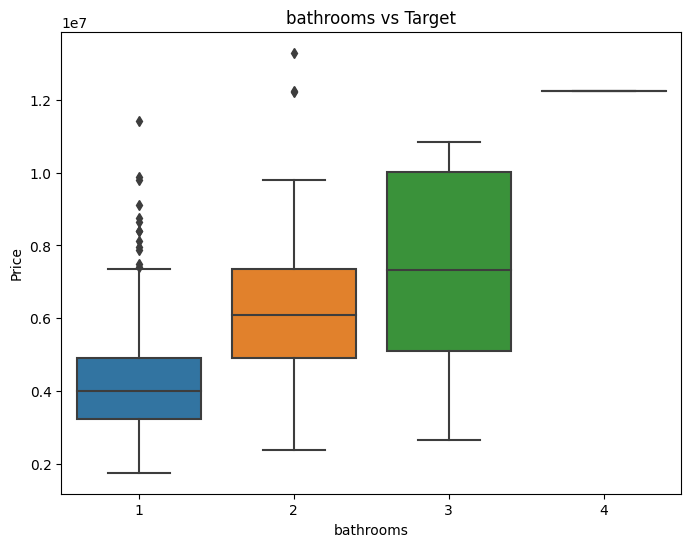

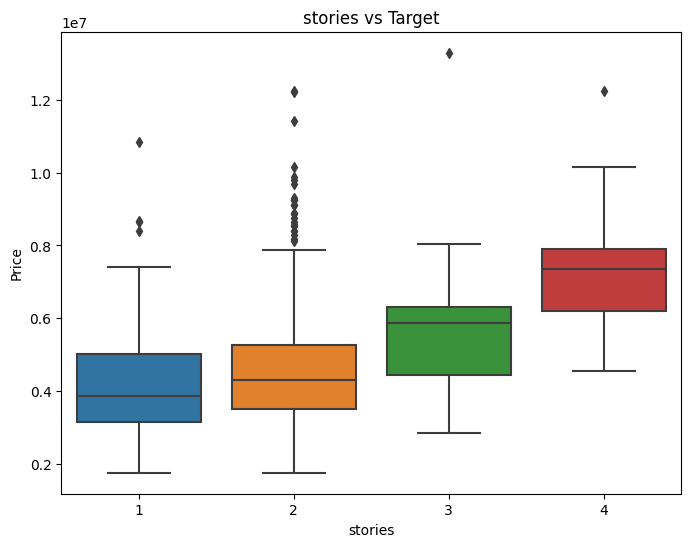

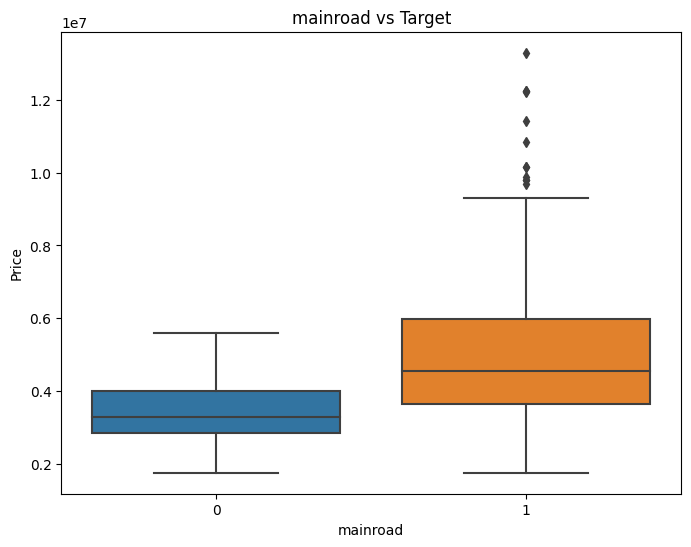

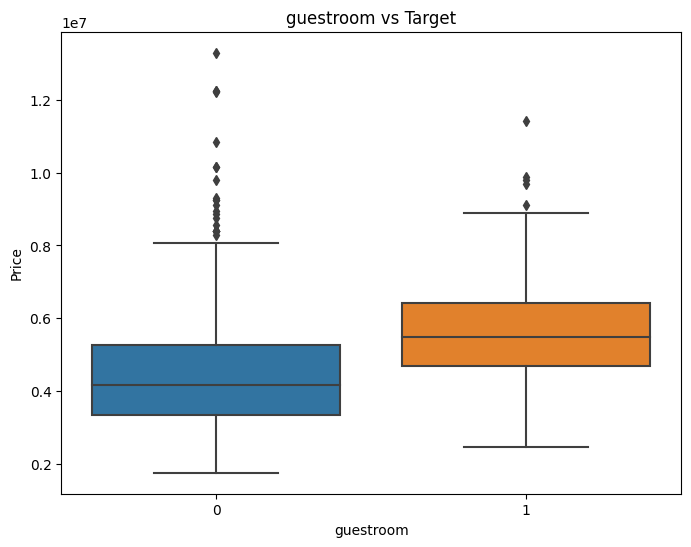

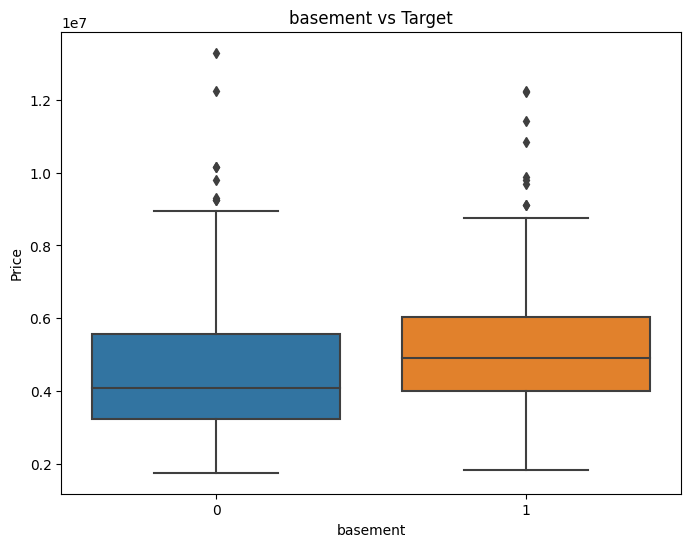

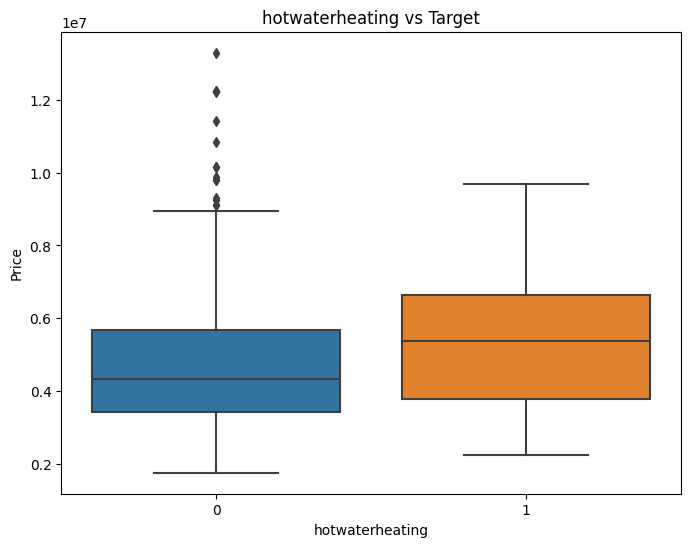

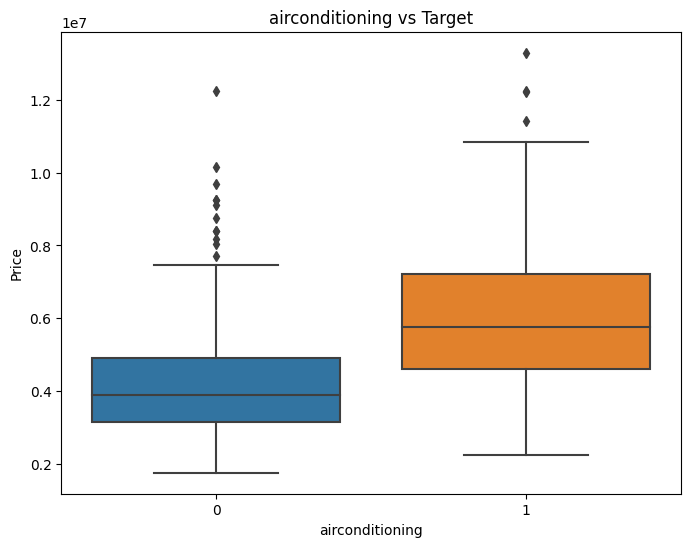

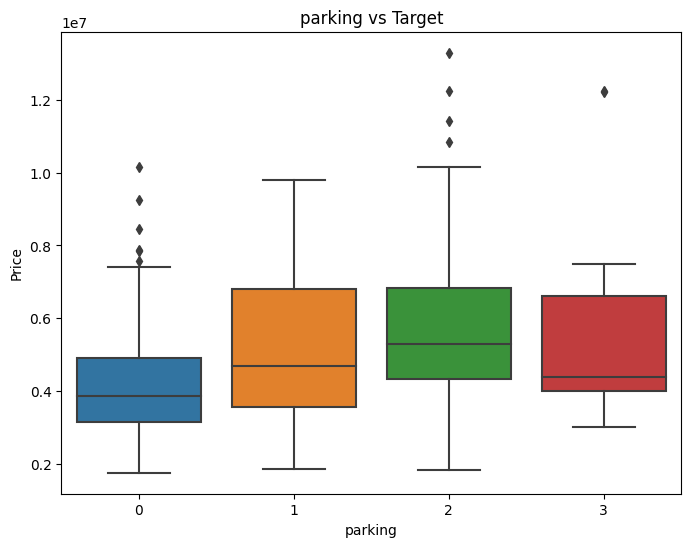

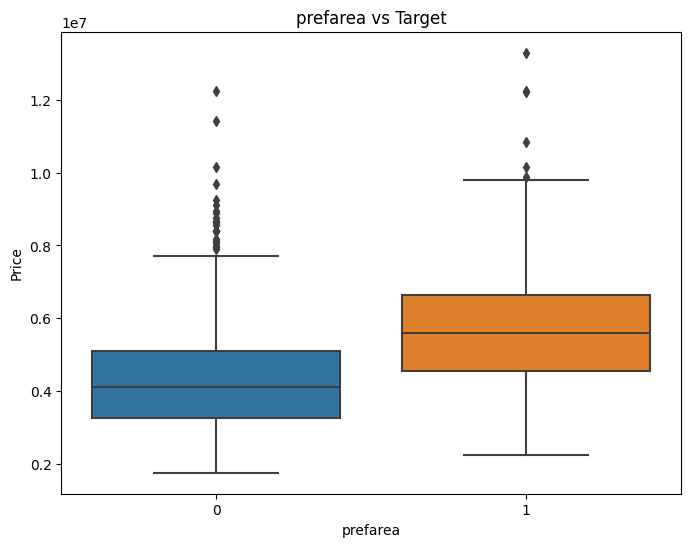

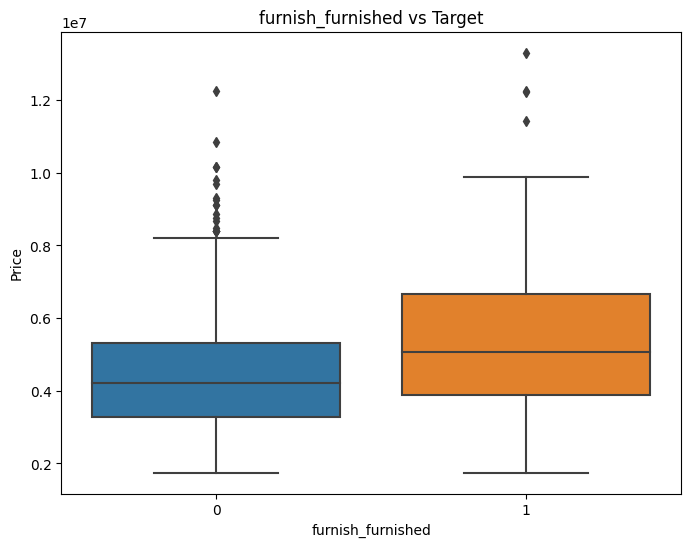

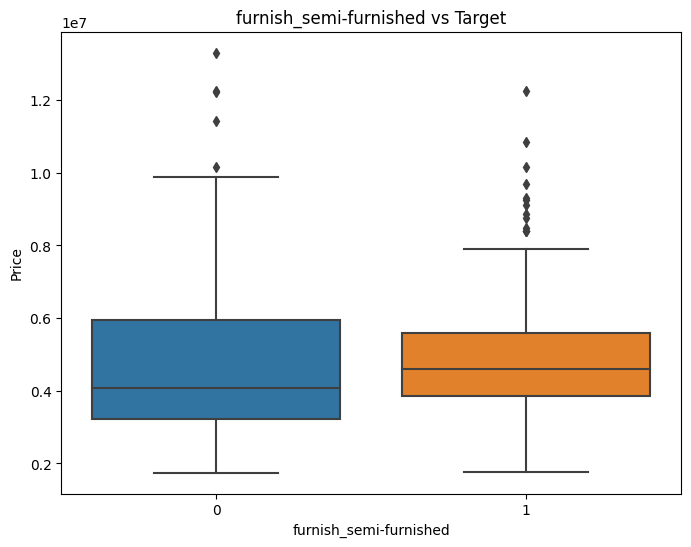

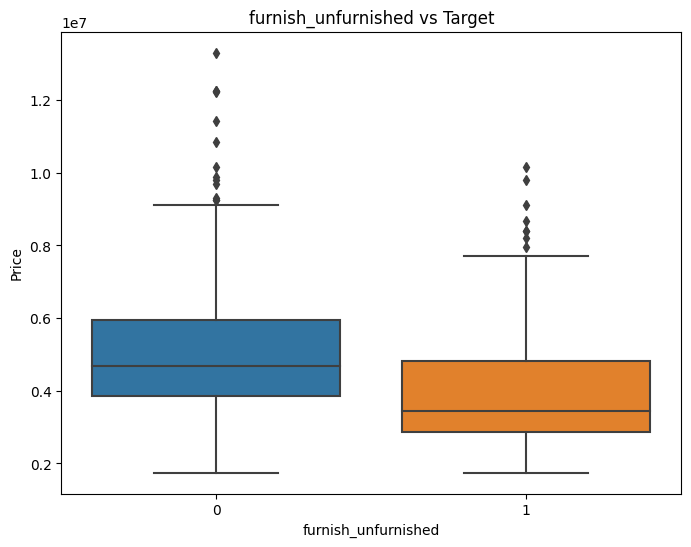

In [11]:
# Box plot for categorical (0,1) data to check outliers
for col in X.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=X[col],y=y)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'{col} vs Target')
    plt.show()

In [12]:
# split data into training set, cross validation set and test set 
X_train,X_, y_train, y_ = train_test_split(X, y, test_size = 0.4, random_state = 32)

X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = 32)

print(f"Size of X_train {X_train.shape}")
print(f"Size of y_train {y_train.shape}")
print(f"Size of X_cv {X_cv.shape}")
print(f"Size of y_cv {y_cv.shape}")
print(f"Size of X_test {X_test.shape}")
print(f"Size of y_test {y_test.shape}")

Size of X_train (327, 14)
Size of y_train (327,)
Size of X_cv (109, 14)
Size of y_cv (109,)
Size of X_test (109, 14)
Size of y_test (109,)


In [13]:
# Applying linear regression 

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)

model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_cv)

# Evaluating the model
r2_lr = r2_score(y_cv, y_pred)  # R-squared

print("Linear Regression on Cross-Validation Dataset")
print(f"R-squared value: {r2_lr}")


Linear Regression on Cross-Validation Dataset
R-squared value: 0.7207936280616944


In [14]:
# Polynomial Regression
d = 2
poly = PolynomialFeatures(degree= d, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_cv_poly = poly.transform(X_cv)

model.fit(X_train_poly, y_train)
y_pred_poly = model.predict(X_cv_poly)

r2_pr = r2_score(y_cv, y_pred_poly)  # R-squared


print("Polynomial Features with degree: ", d )
print(f"R-squared value: {r2_pr}")

Polynomial Features with degree:  2
R-squared value: -2.723695253288767e+21


In [15]:
# Applying Ridge and Lasso for Optimization
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
r2_ridge = ridge.score(X_cv, y_cv)
print("Ridge Regression R^2: ",r2_ridge )

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
r2_lasso = lasso.score(X_cv, y_cv)
print("Lasso Regression R^2: ", r2_lasso)

Ridge Regression R^2:  0.7206431064050276
Lasso Regression R^2:  0.7207936312638783


Lasso Regression r2 value is similar to Linear Regression r2 value.

In [16]:
r2 = [r2_lr, r2_pr, r2_ridge, r2_lasso]
models = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
sorted_models = sorted(zip(r2, models))
for r2_value, model in sorted_models:
    print(f"R-squared value for {model}: {r2_value}")

R-squared value for Polynomial Regression: -2.723695253288767e+21
R-squared value for Ridge Regression: 0.7206431064050276
R-squared value for Linear Regression: 0.7207936280616944
R-squared value for Lasso Regression: 0.7207936312638783


**Feature Engineering**

Improving the model by adding more features

In [17]:
# Adding Features:: Feature Engineering

X['large_house'] = ((X['bedrooms']>=3) & (X['bathrooms']>=2)).astype(int)

X['total_bed_bath'] = X['bedrooms']+X['bathrooms']

X['luxury_score'] = X["airconditioning"] + X["hotwaterheating"] + X["guestroom"] + X["furnish_furnished"]*1 + X["furnish_semi-furnished"]*0.5 

X['comfort'] = X[['airconditioning','hotwaterheating', 'prefarea' ]].sum(axis=1)

X['space_capacity'] = X[['basement', 'guestroom', 'parking', 'stories','bedrooms', 'bathrooms']].sum(axis=1)

X['accessibility'] = X[['mainroad', 'parking']].sum(axis=1)

X['total_rooms'] = X[['bedrooms', 'bathrooms', 'guestroom', 'basement']].sum(axis=1)

X['amenities'] = X[['airconditioning','hotwaterheating','guestroom','basement']].sum(axis=1)

X['space_per_rooms'] = X['area']/X['total_rooms']

X['bathroom_parking'] = X['bathrooms'] * X['parking']

X['bedroom_parking'] = X['bedrooms'] * X['parking']

X['accessibility_score'] = X['mainroad']*X['parking']*X['prefarea']

X['basement_heating'] = X["basement"] * X["hotwaterheating"]

X['total_utilities'] = X["airconditioning"] + X["hotwaterheating"] + X["basement"]

In [18]:
print("Shape of the new dataset with added features:", X.shape)
print("Column list: \n", X.columns.tolist())
X.head()

Shape of the new dataset with added features: (545, 28)
Column list: 
 ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnish_furnished', 'furnish_semi-furnished', 'furnish_unfurnished', 'large_house', 'total_bed_bath', 'luxury_score', 'comfort', 'space_capacity', 'accessibility', 'total_rooms', 'amenities', 'space_per_rooms', 'bathroom_parking', 'bedroom_parking', 'accessibility_score', 'basement_heating', 'total_utilities']


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,space_capacity,accessibility,total_rooms,amenities,space_per_rooms,bathroom_parking,bedroom_parking,accessibility_score,basement_heating,total_utilities
0,7420,4,2,3,1,0,0,0,1,2,...,11,3,6,1,1236.666667,4,8,2,0,1
1,8960,4,4,4,1,0,0,0,1,3,...,15,4,8,1,1120.000000,12,12,0,0,1
2,9960,3,2,2,1,0,1,0,0,2,...,10,3,6,1,1660.000000,4,6,2,0,1
3,7500,4,2,2,1,0,1,0,1,3,...,12,4,7,2,1071.428571,6,12,3,0,2
4,7420,4,1,2,1,1,1,0,1,2,...,11,3,7,3,1060.000000,2,8,0,0,2


In [19]:
# Correlation matrix for the new dataframe
df_copy = X.copy()
df_copy['price'] = df['price']
corr_df = df_copy.corr()
corr_df =corr_df.drop(['price'], axis=0 )
print("Correlation between Target variable(price) and other variables: ")
print(corr_df['price'])

sorted_corr = corr_df['price'].sort_values(ascending=False)
#print("Correlation between Target variable(price) Sorted ")
#print(sorted_corr)


Correlation between Target variable(price) and other variables: 
area                      0.535997
bedrooms                  0.366494
bathrooms                 0.517545
stories                   0.420712
mainroad                  0.296898
guestroom                 0.255517
basement                  0.187057
hotwaterheating           0.093073
airconditioning           0.452954
parking                   0.384394
prefarea                  0.329777
furnish_furnished         0.229350
furnish_semi-furnished    0.063656
furnish_unfurnished      -0.280587
large_house               0.519730
total_bed_bath            0.511809
luxury_score              0.543760
comfort                   0.551300
space_capacity            0.670119
accessibility             0.437619
total_rooms               0.535386
amenities                 0.462278
space_per_rooms           0.130815
bathroom_parking          0.507256
bedroom_parking           0.444058
accessibility_score       0.348018
basement_heating         

In [20]:
# split data into training set, cross validation set and test set 
X_train,X_, y_train, y_ = train_test_split(X, y, test_size = 0.4, random_state = 32)

X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.5, random_state = 32)

column_names = X_train.columns

print(f"Size of X_train {X_train.shape}")
print(f"Size of y_train {y_train.shape}")
print(f"Size of X_cv {X_cv.shape}")
print(f"Size of y_cv {y_cv.shape}")
print(f"Size of X_test {X_test.shape}")
print(f"Size of y_test {y_test.shape}")
print(column_names)

Size of X_train (327, 28)
Size of y_train (327,)
Size of X_cv (109, 28)
Size of y_cv (109,)
Size of X_test (109, 28)
Size of y_test (109,)
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnish_furnished', 'furnish_semi-furnished', 'furnish_unfurnished',
       'large_house', 'total_bed_bath', 'luxury_score', 'comfort',
       'space_capacity', 'accessibility', 'total_rooms', 'amenities',
       'space_per_rooms', 'bathroom_parking', 'bedroom_parking',
       'accessibility_score', 'basement_heating', 'total_utilities'],
      dtype='object')


In [21]:
# Scale data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

In [22]:
# Applying linear regression with added features

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predict
y_pred = lr_model.predict(X_cv)

# Evaluating the model
r2_lr_2 = r2_score(y_cv, y_pred)  # R-squared

print("Linear Regression on Cross-Validation Dataset")
print(f"R-squared value: {r2_lr_2}")

Linear Regression on Cross-Validation Dataset
R-squared value: 0.7205856388491105


In [23]:
# Applying Decision Tree with added features

dt_model = DecisionTreeRegressor(max_depth =5, random_state = 42)
dt_model.fit(X_train, y_train)

# predict
y_pred = dt_model.predict(X_cv)

# Evaluating the model
r2_dt = r2_score(y_cv, y_pred)

print("Decision Tree model on Cross-Validation Dataset")
print(f"R-squared value: {r2_dt}")

Decision Tree model on Cross-Validation Dataset
R-squared value: 0.47746225381713914


In [24]:
# Applying Random Forest with added features

rf_model = RandomForestRegressor(n_estimators=100,max_depth =5, random_state = 42)
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_cv)

# Evaluating the model
r2_rf = r2_score(y_cv, y_pred)

print("Random Forest model on Cross-Validation Dataset")
print(f"R-squared value: {r2_rf}")

Random Forest model on Cross-Validation Dataset
R-squared value: 0.6279444079506873


In [25]:
X_train = pd.DataFrame(X_train, columns=column_names)  # Use actual feature names
X_cv = pd.DataFrame(X_cv, columns=column_names) 
X_test = pd.DataFrame(X_test, columns=column_names) 

In [26]:
# Polynomial and Linear Regression
d = 2

selected_features = corr_df[(corr_df['price'] >= 0.3) & (corr_df['price'] <= 0.5)].index.tolist()
other_features = [col for col in X_train.columns if col not in selected_features]

# Define the transformer for polynomial features on selected features
polynomial_transformer = PolynomialFeatures(degree=d, include_bias=False)

scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('poly', polynomial_transformer, selected_features),
        ('passthrough','passthrough', other_features)
    ]
)
pipeline_poly_lin = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("scaler", StandardScaler()), 
    ('lin_reg', LinearRegression())
])

pipeline_poly_lin.fit(X_train, y_train)

y_pred_train = pipeline_poly_lin.predict(X_train)
y_pred_cv = pipeline_poly_lin.predict(X_cv)


# Evaluating
r2_train = r2_score(y_train, y_pred_train)
r2_poly_lin = r2_score(y_cv,y_pred_cv)


# model.score(y_train, y_cv, y_pred)
print("R-squared value for Training: \n", r2_train)
print("R-squared value for Cross Validation: \n", r2_poly_lin)


R-squared value for Training: 
 0.751515086521647
R-squared value for Cross Validation: 
 0.7264663604632888


In [27]:
# Polynomial and Ridge Regression
d = 2
selected_features = corr_df[(corr_df['price'] >= 0.3) & (corr_df['price'] <= 0.5)].index.tolist()
other_features = [col for col in X_train.columns if col not in selected_features]

# Define the transformer for polynomial features on selected features
polynomial_transformer = PolynomialFeatures(degree=d, include_bias=False)

scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers = [
        ('poly', polynomial_transformer, selected_features),
        ('passthrough','passthrough', other_features)
    ]
)

# Ridge performs better
pipeline_poly_ridge = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ("scaler", StandardScaler()), 
    ('ridge_reg', Ridge(alpha=10))
])

pipeline_poly_ridge.fit(X_train, y_train)

y_pred_train = pipeline_poly_ridge.predict(X_train)
y_pred_cv = pipeline_poly_ridge.predict(X_cv)


# Evaluating
r2_train = r2_score(y_train, y_pred_train)
r2_poly_ridge = r2_score(y_cv,y_pred_cv)


# model.score(y_train, y_cv, y_pred)
print("R-squared value for Training: \n", r2_train)
print("R-squared value for Cross Validation: \n", r2_poly_ridge)


R-squared value for Training: 
 0.7401476170044057
R-squared value for Cross Validation: 
 0.7304561366137754


In [28]:
r2 = [r2_lr, r2_pr, r2_ridge, r2_lasso, r2_lr_2, r2_dt, r2_rf, r2_poly_lin, r2_poly_ridge]
models = ['Linear Regression', 'Polynomial Regression(degree=2)', 'Ridge Regression', 'Lasso Regression','Linear Regression(FE)','Decision Tree (FE)', 
          'Random Forest(FE)','Polynomial-Linear Regression', 'Polynomial-Ridge Regression(FE)' ]
sorted_models = sorted(zip(r2, models))
for r2_value, model in sorted_models:
    print(f"R-squared value for {model}: {r2_value}")

R-squared value for Polynomial Regression(degree=2): -2.723695253288767e+21
R-squared value for Decision Tree (FE): 0.47746225381713914
R-squared value for Random Forest(FE): 0.6279444079506873
R-squared value for Linear Regression(FE): 0.7205856388491105
R-squared value for Ridge Regression: 0.7206431064050276
R-squared value for Linear Regression: 0.7207936280616944
R-squared value for Lasso Regression: 0.7207936312638783
R-squared value for Polynomial-Linear Regression: 0.7264663604632888
R-squared value for Polynomial-Ridge Regression(FE): 0.7304561366137754


In [29]:
# Zip R² values with model names and sort them in descending order
sorted_models = sorted(zip(r2, models), reverse=True)

# Print sorted R² values
print("\nModels sorted by R² (Higher is better):")
for r2_value, model in sorted_models:
    print(f"{model}: R² = {r2_value}")

# Print the best-performing model
best_r2, best_model = sorted_models[0]
print(f"\n Best Model: {best_model} with R² = {best_r2}")


Models sorted by R² (Higher is better):
Polynomial-Ridge Regression(FE): R² = 0.7304561366137754
Polynomial-Linear Regression: R² = 0.7264663604632888
Lasso Regression: R² = 0.7207936312638783
Linear Regression: R² = 0.7207936280616944
Ridge Regression: R² = 0.7206431064050276
Linear Regression(FE): R² = 0.7205856388491105
Random Forest(FE): R² = 0.6279444079506873
Decision Tree (FE): R² = 0.47746225381713914
Polynomial Regression(degree=2): R² = -2.723695253288767e+21

 Best Model: Polynomial-Ridge Regression(FE) with R² = 0.7304561366137754


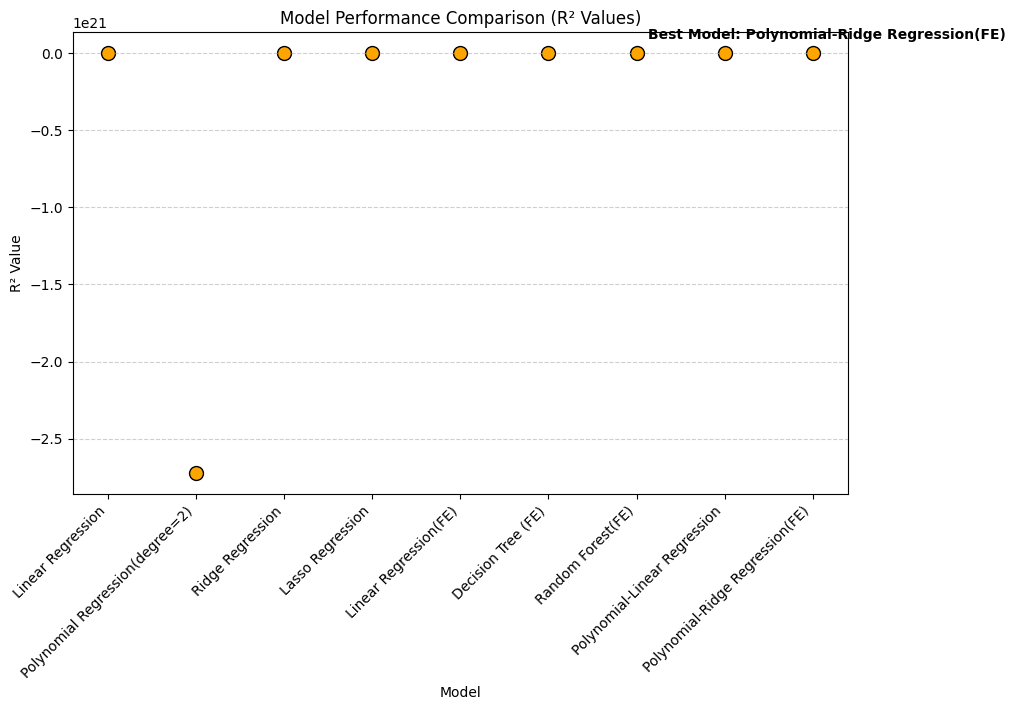

In [30]:
# Create a scatter plot to show the R² values for each model
r2_filtered = [r for i, r in enumerate(r2) if models[i] not in ['Polynomial Regression(deg=2)', 'Polynomial Regression']]
models_filtered = [m for m in models if m not in ['Polynomial Regression(deg=2)', 'Polynomial Regression']]

plt.figure(figsize=(10, 6))
plt.scatter(models_filtered, r2_filtered, color='orange', s=100, edgecolors='black')
plt.xlabel('Model')
plt.ylabel('R² Value')
plt.title('Model Performance Comparison (R² Values)')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Annotate the best model
best_model_idx = r2_filtered.index(max(r2_filtered))
plt.annotate(f'Best Model: {models_filtered[best_model_idx]}', 
             (models_filtered[best_model_idx], r2_filtered[best_model_idx]), 
             textcoords="offset points", xytext=(10,10), ha='center', 
             fontweight='bold', color='black')

plt.xticks(rotation=45, ha='right')
plt.show()


In [31]:
# Predict with test data



# Make predictions
y_pred_train = pipeline_poly_ridge.predict(X_train)
y_pred_cv = pipeline_poly_ridge.predict(X_cv)
y_pred_test = pipeline_poly_ridge.predict(X_test)

# Evaluate the model using R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_cv = r2_score(y_cv, y_pred_cv)
r2_test = r2_score(y_test, y_pred_test)

# Evaluate using Mean Squared Error (optional)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_cv = mean_squared_error(y_cv, y_pred_cv)
mse_test = mean_squared_error(y_test, y_pred_test)

# Cross-validation score (e.g., using 5-fold cross-validation)
cv_score = cross_val_score(pipeline_poly_ridge, X_train, y_train, cv=5, scoring='r2')

# Print the results
print('Final model: Polynomial-Ridge Regression')
print(f"R² value for Test Set: {r2_test:.4f}")
print(f"Mean Squared Error for Test Set: {mse_test:.4f}")
print(f"Cross-validation R² scores: {cv_score}")
print(f"Average Cross-validation R²: {cv_score.mean():.4f}")

Final model: Polynomial-Ridge Regression
R² value for Test Set: 0.6492
Mean Squared Error for Test Set: 1129818794575.3823
Cross-validation R² scores: [0.69035646 0.565788   0.37928627 0.64081958 0.46153013]
Average Cross-validation R²: 0.5476


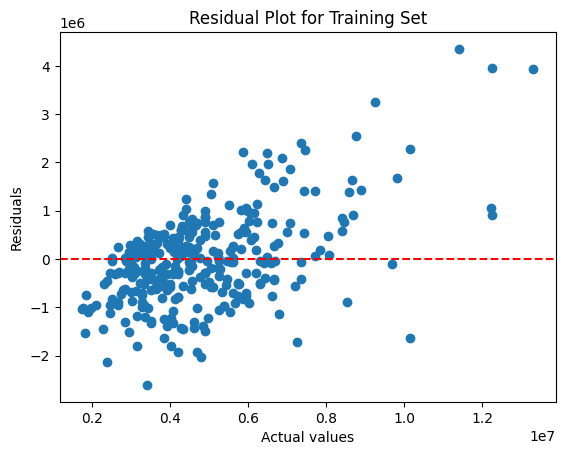

In [32]:
# Residuals for Train Set
residuals_train = y_train - pipeline_poly_ridge.predict(X_train)

# Residual plot for training data
plt.scatter(y_train, residuals_train)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Training Set')
plt.show()

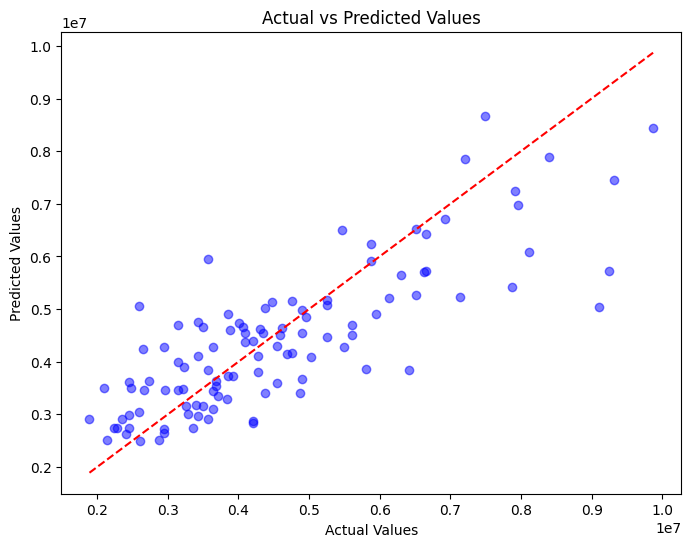

In [33]:
# Actual vs Predicted values
y_pred = pipeline_poly_ridge.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

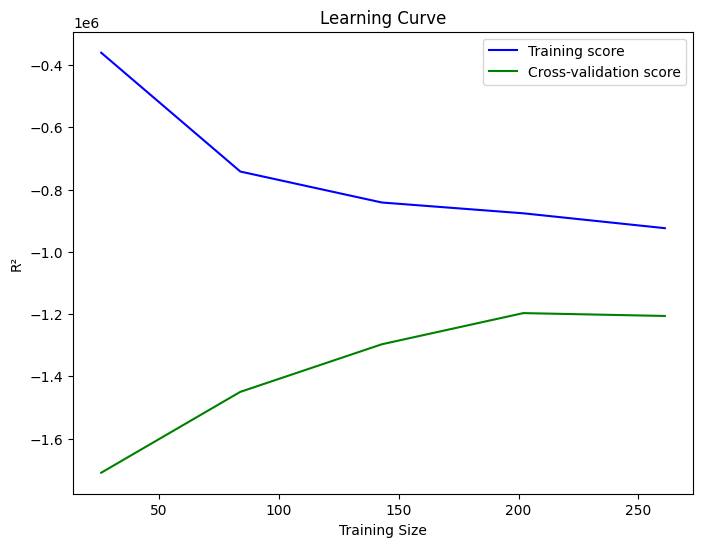

In [34]:
# Compute learning curves
train_sizes, train_scores, val_scores = learning_curve(pipeline_poly_ridge, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

# Mean and std deviation of train and validation scores
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, val_mean, label='Cross-validation score', color='green')
plt.xlabel('Training Size')
plt.ylabel('R²')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()